In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm_notebook
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster, datasets
from sklearn.ensemble import RandomForestClassifier

In [24]:
df=pd.read_csv(r'C:\Users\a0987\OneDrive\文件\virtual.csv')

In [25]:
df.head()

,Date,幣別,價格(USD),日報酬率,5日波動率/5日平均價,成交量,美元指數,高波動=1;低波動=2
0,2015/9/5,BTC,235.018997,2.03%,1.33%,20671400.0,96.23,0
1,2015/9/5,ETH,1.338810,4.93%,2.96%,448453.0,96.23,0
2,2015/9/5,XMR,0.481594,2.89%,1.99%,25003.0,96.23,0
3,2015/9/5,LTC,2.919540,7.78%,3.99%,2666820.0,96.23,0
4,2015/9/5,XRP,0.007860,6.64%,2.98%,856833.0,96.23,0


In [26]:
le=LabelEncoder()
df['幣別']=le.fit_transform(df['幣別'])

In [27]:
df['日報酬率'] = df['日報酬率'].str.strip('%').astype(float)/100 
df['5日波動率/5日平均價'] = df['5日波動率/5日平均價'].str.strip('%').astype(float)/100 

In [28]:
df.rename(columns={"價格(USD)": "usd", "日報酬率": "DROE","成交量":'Volume','美元指數':'DI','高波動=1;低波動=2':'target','5日波動率/5日平均價':'5days'},inplace=True)


In [42]:
X = df[[ 'usd', 'DROE',  'Volume', 'DI']]
y = df['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [31]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.788130185067007


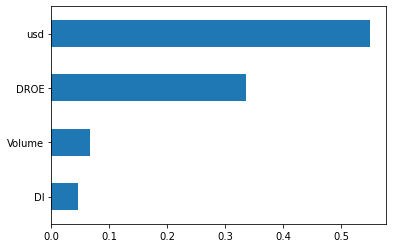

In [32]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')
plt.savefig("權重.png",dpi=100)

# 分群

In [33]:
#可做可不做
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_almost_equal


scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)  # 注意維度


Z = (X - X.mean(axis=0)) / X.std(axis=0, ddof=0)
assert_almost_equal(Z, Z_sk)

# 更新我們的 DataFrame
X = Z

In [34]:
X

,usd,DROE,Volume,DI
0,-0.222077,0.333249,-0.397224,0.145544
1,-0.261651,0.867609,-0.398294,0.145544
2,-0.261796,0.491714,-0.398317,0.145544
3,-0.261383,1.392757,-0.398177,0.145544
4,-0.261876,1.182698,-0.398273,0.145544
...,...,...,...,...
12529,0.158598,-1.833675,1.306780,-1.848339
12530,-0.223775,-2.032679,-0.381011,-1.848339
12531,-0.232217,-1.841046,-0.182193,-1.848339
12532,-0.261729,-1.872371,-0.120392,-1.848339


In [35]:
from sklearn.decomposition import PCA


In [43]:
Xc=X.iloc[:,:-1].values

In [44]:
pca = PCA(n_components=1)
pca.fit(Xc)
X_pca = pca.transform(Xc)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (12534, 4)
transformed shape: (12534, 1)


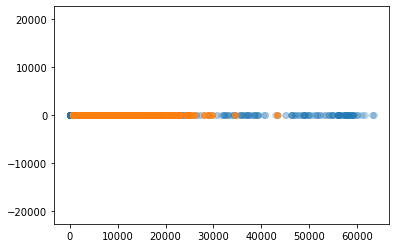

In [45]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(Xc[:, 0], Xc[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [46]:
ml=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [47]:
ml.fit_predict(X_new)

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

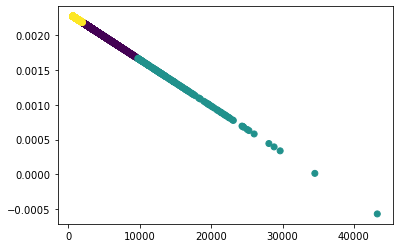

In [49]:
plt.scatter(X_new[:,0],X_new[:,1],c=ml.fit_predict(X_new))
plt.savefig("分群.png",dpi=500)

# Co matrix

In [50]:
df_co=df.drop(['幣別','Date', 'target','5days'],axis=1)

In [51]:
co_matrix = []
for num in tqdm_notebook(range(len(df_co))):
    each_list = list(df_co.loc[num])
    each_co_matrix = []
    for n in range(len(each_list)):
        if n == 0:
            if each_list[n] <= 1:
                each_co_matrix.append('usd <= 1')
            elif 1 < each_list[n] and each_list[n] <= 43.331366:
                each_co_matrix.append('1 < usd <= 43.331366')
            elif 43.331366 < each_list[n] and each_list[n] <= 239.379131:
                each_co_matrix.append('43.331366 < usd <= 239.379131')
            else:
                each_co_matrix.append('239.379131 < usd')
        elif n == 1:
            if each_list[n] <= -0.015000:
                each_co_matrix.append('DROE <= -0.015000')
            elif -0.015000 < each_list[n] and each_list[n] <= 0.000000:
                each_co_matrix.append('-0.015000 < DROE <= 0.000000')
            elif 0.000000 < each_list[n] and each_list[n] <= 0.017200:
                each_co_matrix.append('0.000000 < DROE <= 0.017200')
            else:
                each_co_matrix.append('0.017200 < DROE')
        elif n == 2:
            if each_list[n] <= 2.744918e+07:
                each_co_matrix.append('Volume <= 2.744918e+07')
            elif 2.744918e+07 < each_list[n] and each_list[n] <= 6.314394e+08:
                each_co_matrix.append('2.744918e+07 < Volume <= 6.314394e+08')
            elif 6.314394e+08 < each_list[n] and each_list[n] <= 4.991512e+09:
                each_co_matrix.append('6.314394e+08 < Volume <= 4.991512e+09')
            elif 1 < each_list[n]:
                each_co_matrix.append('4.991512e+09 < Volume')
        elif n == 3:
            if each_list[n] <= 93.550000:
                each_co_matrix.append('DI <= 93.550000')
            elif 93.550000 < each_list[n] and each_list[n] <= 96.140000:
                each_co_matrix.append('93.550000 < DI <= 96.140000')
            elif 96.140000 < each_list[n] and each_list[n] <= 97.860000:
                each_co_matrix.append('96.140000 < DI <= 97.860000')
            elif 1 < each_list[n]:
                each_co_matrix.append('97.860000 < DI')
        
    co_matrix.append(each_co_matrix)

<ipython-input-51-99417c0a0994>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for num in tqdm_notebook(range(len(df_co))):


In [52]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(co_matrix).transform(co_matrix)
dc = pd.DataFrame(te_ary, columns=te.columns_)

In [53]:
col = list(dc.columns)
co_matrix_df = pd.DataFrame(columns=col)
co_matrix_weight = []
for index in tqdm_notebook(col):
    line_list = []
    for dc_label in col:
        if index == dc_label:
            line_list.append(0)
#             co_matrix_weight.append([index, dc_label, 0])
        else:
            df1 = dc[dc[index] == True]
            df1 = df1[df1[dc_label] == True]
            line_list.append(len(df1))
#             co_matrix_weight.append([index, dc_label, len(df1)])
            if len(df1) >= 0:
                co_matrix_weight.append([index, dc_label, len(df1)])
        
    co_matrix_df.loc[index] = line_list

<ipython-input-53-2daf63df2cb6>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index in tqdm_notebook(col):


In [54]:
co_matrix_df = co_matrix_df.fillna(0)

In [55]:
co_matrix_df

,-0.015000 < DROE <= 0.000000,0.000000 < DROE <= 0.017200,0.017200 < DROE,1 < usd <= 43.331366,2.744918e+07 < Volume <= 6.314394e+08,239.379131 < usd,4.991512e+09 < Volume,43.331366 < usd <= 239.379131,6.314394e+08 < Volume <= 4.991512e+09,93.550000 < DI <= 96.140000,96.140000 < DI <= 97.860000,97.860000 < DI,DI <= 93.550000,DROE <= -0.015000,Volume <= 2.744918e+07,usd <= 1
-0.015000 < DROE <= 0.000000,0,0,0,935,634,597,844,538,696,925,902,938,594,0,1185,1289
0.000000 < DROE <= 0.017200,0,0,0,974,670,770,872,570,758,733,776,739,661,0,609,595
0.017200 < DROE,0,0,0,560,930,956,752,993,826,684,744,721,978,0,619,618
1 < usd <= 43.331366,935,974,560,0,418,0,737,0,418,796,713,1007,512,559,1455,0
2.744918e+07 < Volume <= 6.314394e+08,634,670,930,418,0,757,0,1366,0,970,720,698,745,899,0,592
239.379131 < usd,597,770,956,0,757,0,1556,0,804,725,613,543,1253,811,17,0
4.991512e+09 < Volume,844,872,752,737,0,1556,0,556,0,229,910,695,1300,666,0,285
43.331366 < usd <= 239.379131,538,570,993,0,1366,0,556,0,981,653,1026,638,816,1032,230,0
6.314394e+08 < Volume <= 4.991512e+09,696,758,826,418,0,804,0,981,0,765,907,419,1042,853,0,930
93.550000 < DI <= 96.140000,925,733,684,796,970,725,229,653,765,0,0,0,0,778,1156,946


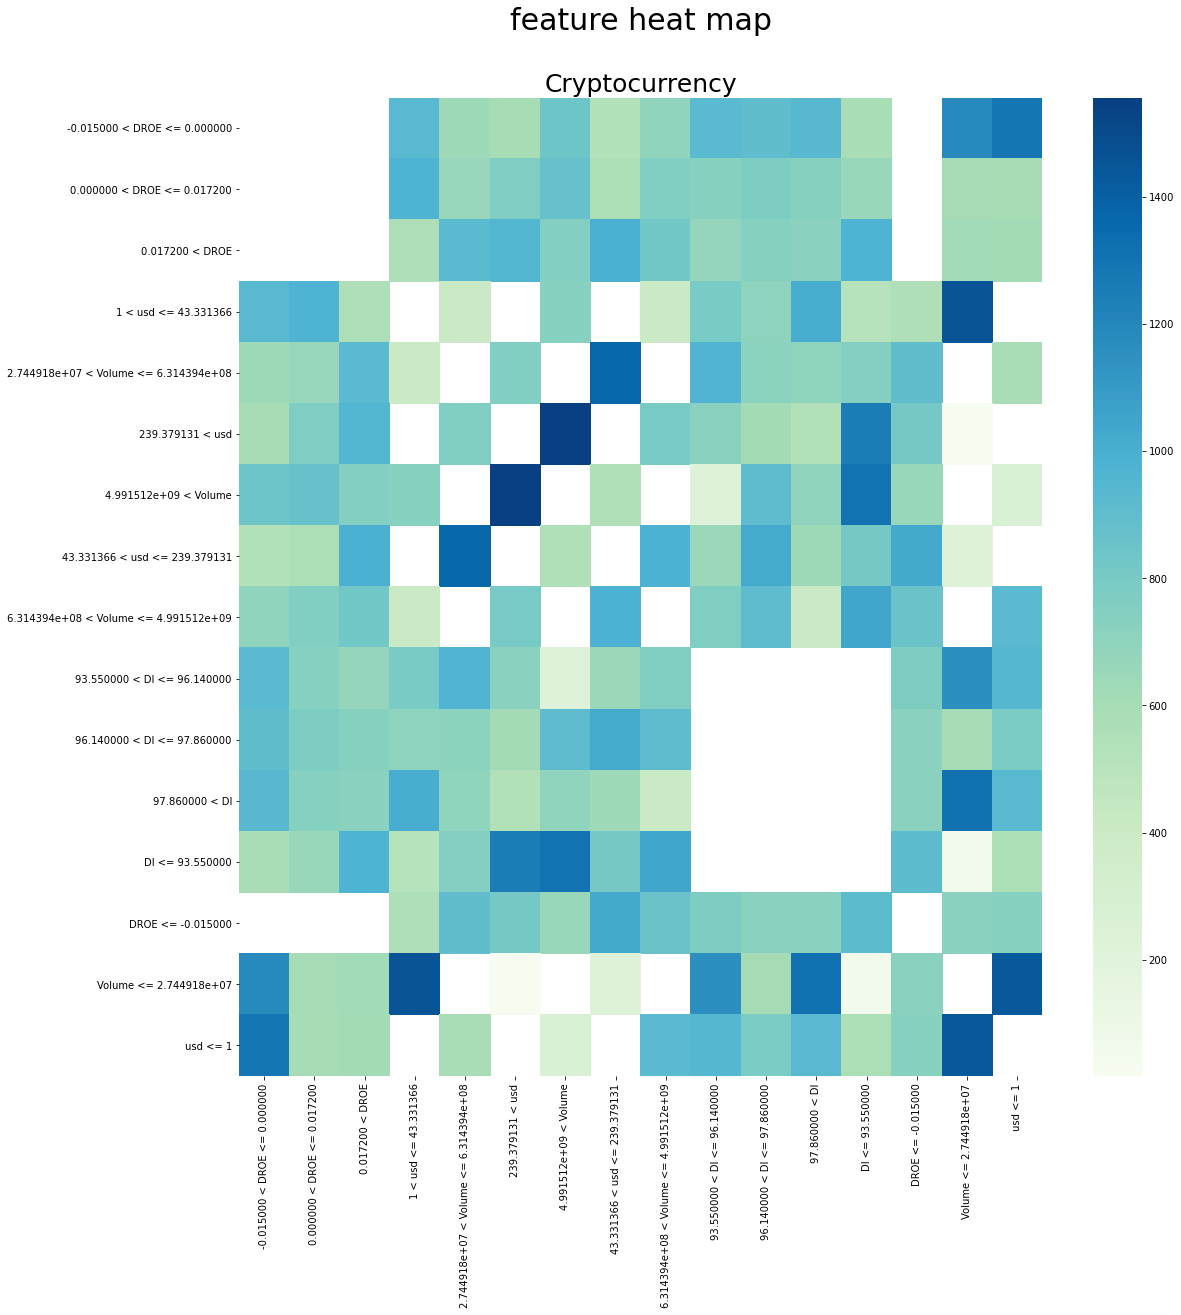

In [56]:
plt.figure(figsize=(18,18))
sns.heatmap(co_matrix_df,mask=co_matrix_df < 1,cmap='GnBu')
plt.title('Cryptocurrency', size = 25)
plt.suptitle('feature heat map',x = 0.435,y=0.95, fontsize=30)
plt.savefig("CO.png",dpi=100)

# 關聯規則

In [447]:
from mlxtend.frequent_patterns import apriori
apr_1 = apriori(df1, min_support=0.4,use_colnames=True)

In [448]:
from mlxtend.frequent_patterns import association_rules
ar_1 = association_rules(apr_1)
ar_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(-0.015000 < Daily rate of return <= 0.000000),(Volume <= 2.744918e+07),0.511173,1.0,0.511173,1.0,1.0,0.0,inf
1,(-0.015000 < Daily rate of return <= 0.000000),(usd <= 1),0.511173,1.0,0.511173,1.0,1.0,0.0,inf
2,(97.860000 < Dollar Index),(Volume <= 2.744918e+07),0.430168,1.0,0.430168,1.0,1.0,0.0,inf
3,(97.860000 < Dollar Index),(usd <= 1),0.430168,1.0,0.430168,1.0,1.0,0.0,inf
4,(Volume <= 2.744918e+07),(usd <= 1),1.000000,1.0,1.000000,1.0,1.0,0.0,inf
5,(usd <= 1),(Volume <= 2.744918e+07),1.000000,1.0,1.000000,1.0,1.0,0.0,inf
6,"(-0.015000 < Daily rate of return <= 0.000000,...",(Volume <= 2.744918e+07),0.511173,1.0,0.511173,1.0,1.0,0.0,inf
7,"(Volume <= 2.744918e+07, -0.015000 < Daily rat...",(usd <= 1),0.511173,1.0,0.511173,1.0,1.0,0.0,inf
8,(-0.015000 < Daily rate of return <= 0.000000),"(Volume <= 2.744918e+07, usd <= 1)",0.511173,1.0,0.511173,1.0,1.0,0.0,inf
9,"(Volume <= 2.744918e+07, 97.860000 < Dollar In...",(usd <= 1),0.430168,1.0,0.430168,1.0,1.0,0.0,inf
